#1. 
A **Classification Decision Tree** is a supervised learning model used for classification problems, predicting categorical outcomes by splitting data into subsets based on feature values, forming a tree-like structure. For example, it can be used in medical diagnosis to classify diseases, in spam filtering to label emails as spam or not, and in loan approvals to decide acceptance or rejection. Unlike **Multiple Linear Regression**, which predicts continuous outcomes using a linear equation (e.g., house prices), a decision tree predicts by following rules from the root to a leaf, assigning a class label at the end. The key difference is that decision trees handle categorical predictions via rule-based splits, while linear regression predicts numerical values using weighted sums.



chat gpt summarize:
    
    We discussed **Classification Decision Trees**, which predict categorical outcomes by splitting data based on feature values, and their applications in tasks like disease diagnosis and spam filtering. We compared them to **Multiple Linear Regression (MLR)**, which predicts continuous outcomes using a linear equation. While classification trees are commonly used for categorical predictions, decision trees can also handle continuous outcomes in **Regression Trees**, making them versatile for both types of tasks.
    
https://chatgpt.com/share/673eb6e0-b220-8007-9273-b6a3667042c8

Q2

for accuracy, we use for General-purpose classification tasks where both false positives (FP) and false negatives (FN) are equally problematic.Predicting whether an email is spam or not. Accuracy works well here if both misclassifying spam as not-spam and vice versa carry similar consequences.

accuracy we can know how much dicision our model made correctly, which can reflect whether or not our model is a good model.

for sensitivity, we use for Situations where missing actual positive cases (false negatives) is critical.Medical diagnosis, such as screening for cancer. Missing a true positive case (failing to detect cancer when it’s present) can have severe consequences.

sensitivity we can get how much case out of all positive canse we guess is correct.

for specificity, Applications where correctly identifying actual negatives (true negatives) is crucial, and false positives need to be minimized.
Example: Fraud detection in financial transactions. Specificity is important here to avoid flagging legitimate transactions as fraudulent, which could inconvenience users.

specificity we get how much case out of all negative case we guess is correct.

for precision, Situations where the cost of false positives is high, and we want to ensure that positive predictions are mostly correct.
Example: Predicting whether a customer is eligible for a premium financial product. Precision is critical because offering the product to ineligible customers (false positives) could lead to financial losses.

precision we can get how much we guessed right in all positives.


chat gpt:
We discussed real-world applications of performance metrics: **accuracy** is suitable for general tasks where false positives and false negatives are equally important (e.g., spam detection). **Sensitivity** is key in cases where missing positives is critical (e.g., cancer diagnosis). **Specificity** is important for minimizing false positives (e.g., fraud detection), and **precision** is ideal when false positives carry high costs (e.g., offering premium financial products). Each metric is chosen based on the specific needs and consequences of errors in the application.


cannot share link due to picture include:

Here’s how each metric can be applied to real-world scenarios, along with an explanation of why they’re most appropriate:

Accuracy
Scenario: General-purpose classification tasks where both false positives (FP) and false negatives (FN) are equally problematic.
Example: Predicting whether an email is spam or not. Accuracy works well here if both misclassifying spam as not-spam and vice versa carry similar consequences.
Reason: Accuracy measures the proportion of correctly classified instances (true positives and true negatives) out of all cases.
Sensitivity (Recall)
Scenario: Situations where missing actual positive cases (false negatives) is critical.
Example: Medical diagnosis, such as screening for cancer. Missing a true positive case (failing to detect cancer when it’s present) can have severe consequences.
Reason: Sensitivity focuses on capturing as many true positive cases as possible.
Specificity
Scenario: Applications where correctly identifying actual negatives (true negatives) is crucial, and false positives need to be minimized.
Example: Fraud detection in financial transactions. Specificity is important here to avoid flagging legitimate transactions as fraudulent, which could inconvenience users.
Reason: Specificity measures how well the model identifies true negatives, ensuring fewer false positives.
Precision
Scenario: Situations where the cost of false positives is high, and we want to ensure that positive predictions are mostly correct.
Example: Predicting whether a customer is eligible for a premium financial product. Precision is critical because offering the product to ineligible customers (false positives) could lead to financial losses.
Reason: Precision focuses on the accuracy of positive predictions, ensuring that flagged cases are highly likely to be correct.
In summary, the choice of metric depends on whether minimizing false positives, false negatives, or overall misclassifications is most important for the application.

In [2]:
#Q3

# Step 1: Remove unnecessary columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove)

# Step 2: Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna().copy()  # Use .copy() to avoid chained assignment warnings

# Step 3: Adjust data types using .loc[]
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the structure of the updated DataFrame
print(ab_reduced_noNaN.info())
print(ab_reduced_noNaN.head())


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The

Training set observations: 255
Testing set observations: 64


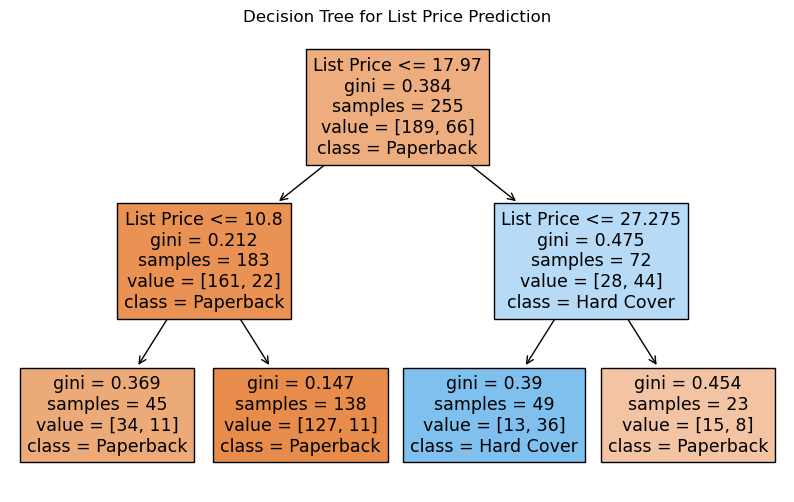

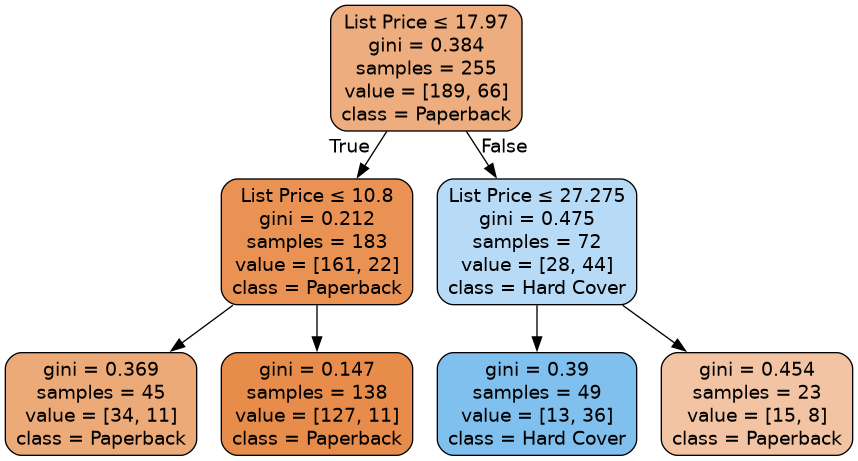

In [4]:
#Q4

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from IPython.display import Image, display

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 2: Remove unnecessary columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove)

# Step 3: Drop rows with NaN values and ensure it's a new copy
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Step 4: Adjust data types
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Step 5: Split the data into 80/20 train/test
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report number of observations
print(f"Training set observations: {len(ab_reduced_noNaN_train)}")
print(f"Testing set observations: {len(ab_reduced_noNaN_test)}")

# Step 6: Prepare X and y for training
X = ab_reduced_noNaN_train[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Step 7: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Step 8: Visualize the Decision Tree using tree.plot_tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hard Cover'], filled=True)
plt.title("Decision Tree for List Price Prediction")
plt.show()

# Step 9: Visualize the Decision Tree using graphviz and display the PNG
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=['List Price'],
    class_names=['Paperback', 'Hard Cover'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Render the tree as a PNG
graph = graphviz.Source(dot_data)
graph.format = "png"  # Set format to PNG
graph.render("decision_tree_image", format="png", cleanup=True)  # Save and clean up

# Display the PNG in Python
display(Image("decision_tree_image.png"))


Here's a summary of our discussion:

Data Preprocessing:
We started by cleaning the dataset by removing columns Weight_oz, Width, and Height, and handling missing values.
We then adjusted the data types for the columns Pub year, NumPages, and Hard_or_Paper.
Train/Test Split:
The dataset was split into training and test sets with an 80/20 ratio using train_test_split and setting a random seed for reproducibility.
The number of observations in the training and testing datasets was printed.
Decision Tree Classifier:
We fitted a DecisionTreeClassifier to predict whether a book is a Hard Cover or Paperback based on the List Price feature.
The model was trained using only List Price as the feature, with a maximum depth of 2.
Visualization:
We used tree.plot_tree(clf) to visualize the decision tree and explained that it makes predictions based on splits of the List Price feature.
The tree uses thresholds of List Price to separate books into two classes, Hard Cover or Paperback.
We also used graphviz to render the decision tree as a PNG image and displayed it within the Python environment.
Further Explanation:
The decision tree's structure splits the data based on price thresholds (e.g., List Price <= X), with predictions made at the leaf nodes based on the majority class.
Let me know if you'd like any further details or if you'd like me to help with interpreting the tree results

https://chatgpt.com/share/673ec408-e4d4-8007-9827-278a914e17ff

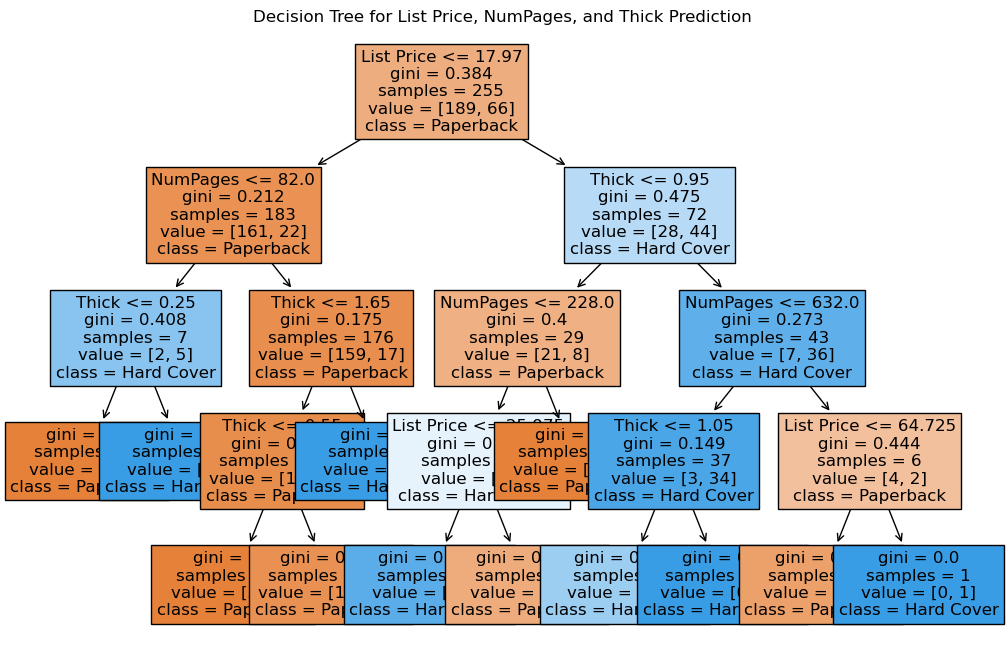

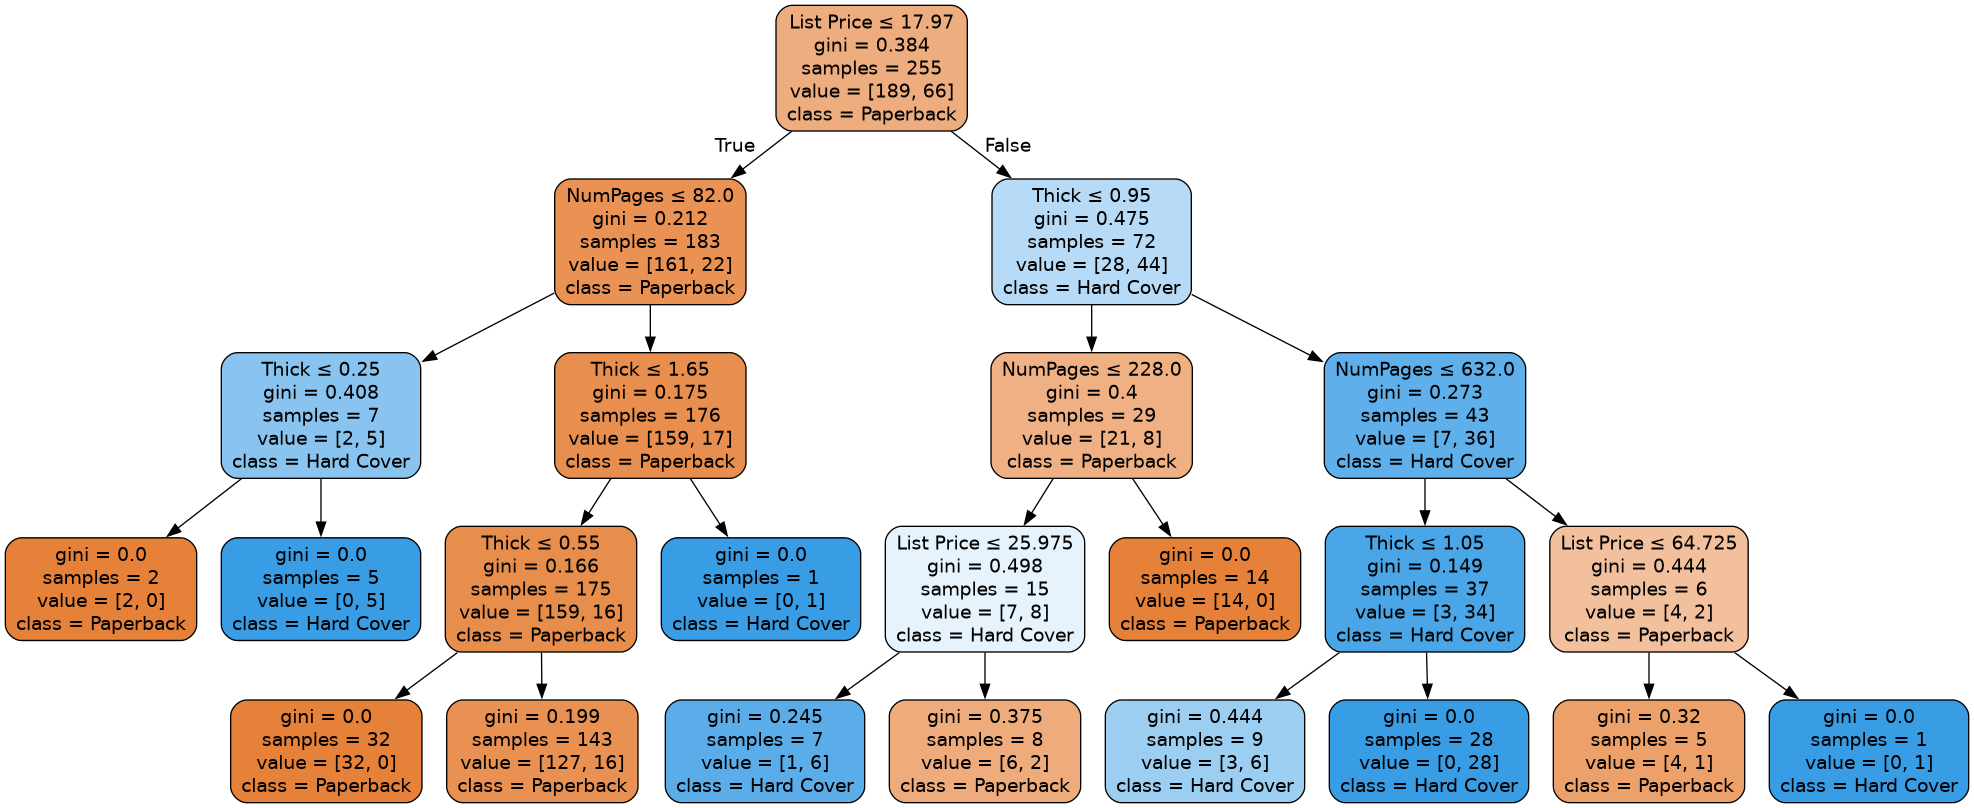

In [5]:
#Q5

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz
from sklearn import tree
from IPython.display import Image, display
import matplotlib.pyplot as plt

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 2: Remove unnecessary columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove)

# Step 3: Drop rows with NaN values and ensure it's a new copy
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Step 4: Adjust data types
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Step 5: Split the data into 80/20 train/test
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Step 6: Prepare X and y for training
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Step 7: Train the Decision Tree Classifier (clf2) with max_depth set to 4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Step 8: Visualize the Decision Tree using tree.plot_tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hard Cover'],
    filled=True,
    fontsize=12
)
plt.title("Decision Tree for List Price, NumPages, and Thick Prediction")
plt.show()

# Step 9: Visualize the Decision Tree using graphviz and display the PNG
dot_data = tree.export_graphviz(
    clf2,
    out_file=None,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hard Cover'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Render the tree as a PNG
graph = graphviz.Source(dot_data)
graph.format = "png"  # Set format to PNG
graph.render("decision_tree_image_clf2", format="png", cleanup=True)  # Save and clean up

# Display the PNG in Python
display(Image("decision_tree_image_clf2.png"))


In [7]:
#Q6
# Step 2: Predict using clf (trained with List Price only)
X_test_clf = X_test[['List Price']]  # Extract only 'List Price' column for clf
y_pred_clf = clf.predict(X_test_clf)

# Step 3: Predict using clf2 (trained with NumPages, Thick, List Price)
X_test_clf2 = X_test[['NumPages', 'Thick', 'List Price']]  # Use all three features for clf2
y_pred_clf2 = clf2.predict(X_test_clf2)

# Step 4: Compute confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Step 5: Calculate performance metrics for clf
TP_clf = cm_clf[1, 1]
TN_clf = cm_clf[0, 0]
FP_clf = cm_clf[0, 1]
FN_clf = cm_clf[1, 0]

sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf)

# Step 6: Calculate performance metrics for clf2
TP_clf2 = cm_clf2[1, 1]
TN_clf2 = cm_clf2[0, 0]
FP_clf2 = cm_clf2[0, 1]
FN_clf2 = cm_clf2[1, 0]

sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)

# Step 7: Display results
print("Model clf (List Price only):")
print(f"Confusion Matrix:\n{cm_clf}")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

print("\nModel clf2 (NumPages, Thick, List Price):")
print(f"Confusion Matrix:\n{cm_clf2}")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


Model clf (List Price only):
Confusion Matrix:
[[40  4]
 [ 6 14]]
Sensitivity: 0.70
Specificity: 0.91
Accuracy: 0.84

Model clf2 (NumPages, Thick, List Price):
Confusion Matrix:
[[40  4]
 [ 5 15]]
Sensitivity: 0.75
Specificity: 0.91
Accuracy: 0.86


Here’s a summary of what we’ve discussed:

Initial Dataset Exploration:
You worked with an Amazon books dataset and performed basic data pre-processing steps like removing certain columns (Weight_oz, Width, Height), handling missing data (dropping rows with NaN entries), and changing data types (converting Pub year and NumPages to int, Hard_or_Paper to category).
Train-Test Split:
You performed an 80/20 split of the dataset into training and testing sets, ensuring reproducibility by setting a random seed.
Decision Tree Classification:
You trained two decision tree classifiers: clf (using only the List Price feature) and clf2 (using NumPages, Thick, and List Price).
We visualized both models using tree.plot_tree(clf) and discussed how predictions are made based on the decision tree structure.
Confusion Matrix and Performance Metrics:
You calculated the confusion matrices for both models (clf and clf2) using the test set (ab_reduced_noNaN_test).
Sensitivity, specificity, and accuracy were computed for each model to assess their performance.
Issues and Fixes:
You encountered an error when trying to use the test set for predictions, which stemmed from mismatched features between training and testing data. The issue was resolved by selecting the appropriate features (List Price for clf and NumPages, Thick, List Price for clf2) for predictions.
Next Steps:
You successfully trained both models, visualized them, and computed the confusion matrices along with their corresponding performance metrics.
This process helped you understand the workflow for preparing data, training models, and evaluating their performance in a classification context
https://chatgpt.com/share/673ec408-e4d4-8007-9827-278a914e17ff

Q7
The difference between the two confusion matrices is due to the predictors used in the clf model. In the first confusion matrix, the model is trained using only the List Price feature, which might not be a strong enough predictor of the Hard_or_Paper classification, potentially leading to higher misclassification rates. In the second confusion matrix, the model uses NumPages, Thick, and List Price, a combination of features that provides more relevant information for the classification task, leading to better predictions. The confusion matrices from clf and clf2 are better because clf2 incorporates more relevant predictors, improving the model's ability to differentiate between Hard and Paper books.
